In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 310)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_x_eng_with_KNN_TSNE_KMean = pd.read_csv("train_x_eng_with_KNN_TSNE_KMean.csv")
test_x_eng_with_KNN_TSNE_Kmean = pd.read_csv("test_x_eng_with_KNN_TSNE_Kmean.csv")

train_y_class = pd.read_csv("train_y_class.csv")
train_y_label = pd.read_csv("train_y_label.csv")

Submission = pd.read_csv("sampleSubmission.csv")

In [3]:
# Read column names from file
cols = list(pd.read_csv("XGBoost_test_x_pred.csv", nrows =1))

XGBoost_train_x_pred = pd.read_csv("XGBoost_train_x_pred.csv", names=["XGBoost_train_x_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
XGBoost_train_x_log_pred = pd.read_csv("XGBoost_train_x_log_pred.csv", names=["XGBoost_train_x_log_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
XGBoost_train_x_eng_pred = pd.read_csv("XGBoost_train_x_eng_pred.csv", names=["XGBoost_train_x_eng_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
XGBoost_train_x_log_eng_pred = pd.read_csv("XGBoost_train_x_log_eng_pred.csv", names=["XGBoost_train_x_log_eng_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
Neural_Network_train_x_pred = pd.read_csv("Neural_Network_train_x_pred.csv", names=["Neural_Network_train_x_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
Neural_Network_train_x_log_pred = pd.read_csv("Neural_Network_train_x_log_pred.csv", names=["Neural_Network_train_x_log_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
Neural_Network_train_x_eng_pred = pd.read_csv("Neural_Network_train_x_eng_pred.csv", names=["Neural_Network_train_x_eng_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
Neural_Network_train_x_log_eng_pred = pd.read_csv("Neural_Network_train_x_log_eng_pred.csv", names=["Neural_Network_train_x_log_eng_pred" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)
XGBoost_train_x_eng_pred_drop_KNN = pd.read_csv("XGBoost_train_x_eng_pred_drop_KNN.csv", names=["XGBoost_train_x_eng_pred_drop_KNN" + str(i) for i in range(1,10,1)])[1:].reset_index(drop=True)

XGBoost_test_x_pred = pd.read_csv("XGBoost_test_x_pred.csv",usecols =[i for i in cols if i != 'id'])
XGBoost_test_x_log_pred = pd.read_csv("XGBoost_test_x_log_pred.csv", usecols =[i for i in cols if i != 'id'])
XGBoost_test_x_eng_pred = pd.read_csv("XGBoost_test_x_eng_pred.csv", usecols =[i for i in cols if i != 'id'])
XGBoost_test_x_log_eng_pred = pd.read_csv("XGBoost_test_x_log_eng_pred.csv", usecols =[i for i in cols if i != 'id'])
Neural_Network_test_x_pred = pd.read_csv("Neural_Network_test_x_pred.csv", usecols =[i for i in cols if i != 'id'])
Neural_Network_test_x_log_pred = pd.read_csv("Neural_Network_test_x_log_pred.csv", usecols =[i for i in cols if i != 'id'])
Neural_Network_test_x_eng_pred = pd.read_csv("Neural_Network_test_x_eng_pred.csv", usecols =[i for i in cols if i != 'id'])
Neural_Network_test_x_log_eng_pred = pd.read_csv("Neural_Network_test_x_log_eng_pred.csv", usecols =[i for i in cols if i != 'id'])
XGBoost_test_x_eng_pred_drop_KNN = pd.read_csv("XGBoost_test_x_eng_pred_drop_KNN.csv", usecols =[i for i in cols if i != 'id'])

XGBoost_test_x_pred.columns = ["XGBoost_train_x_pred" + str(i) for i in range(1,10,1)]
XGBoost_test_x_log_pred.columns = ["XGBoost_train_x_log_pred" + str(i) for i in range(1,10,1)]
XGBoost_test_x_eng_pred.columns = ["XGBoost_train_x_eng_pred" + str(i) for i in range(1,10,1)]
XGBoost_test_x_log_eng_pred.columns = ["XGBoost_train_x_log_eng_pred" + str(i) for i in range(1,10,1)]
Neural_Network_test_x_pred.columns = ["Neural_Network_train_x_pred" + str(i) for i in range(1,10,1)]
Neural_Network_test_x_log_pred.columns = ["Neural_Network_train_x_log_pred" + str(i) for i in range(1,10,1)]
Neural_Network_test_x_eng_pred.columns = ["Neural_Network_train_x_eng_pred" + str(i) for i in range(1,10,1)]
Neural_Network_test_x_log_eng_pred.columns = ["Neural_Network_train_x_log_eng_pred" + str(i) for i in range(1,10,1)]
XGBoost_test_x_eng_pred_drop_KNN.columns = ["XGBoost_train_x_eng_pred_drop_KNN" + str(i) for i in range(1,10,1)]

In [4]:
train_x_all_included = pd.concat([train_x_eng_with_KNN_TSNE_KMean,XGBoost_train_x_log_pred,
                                  XGBoost_train_x_eng_pred,XGBoost_train_x_log_eng_pred,
                                 Neural_Network_train_x_pred,Neural_Network_train_x_log_pred,XGBoost_train_x_eng_pred_drop_KNN,
                                 Neural_Network_train_x_eng_pred,Neural_Network_train_x_log_eng_pred],axis=1)

test_x_all_included = pd.concat([test_x_eng_with_KNN_TSNE_Kmean,XGBoost_test_x_log_pred,
                                  XGBoost_test_x_eng_pred,XGBoost_test_x_log_eng_pred,
                                 Neural_Network_test_x_pred,Neural_Network_test_x_log_pred,XGBoost_test_x_eng_pred_drop_KNN,
                                 Neural_Network_test_x_eng_pred,Neural_Network_test_x_log_eng_pred],axis=1)

In [5]:
drop_columns_KNN = train_x_eng_with_KNN_TSNE_KMean.loc[:,"KNN_Feature_1":"KNN_Feature_36"].columns
drop_columns_K_Class = train_x_eng_with_KNN_TSNE_KMean.loc[:,"Class_0":"Class_8"].columns
train_x_selected = train_x_eng_with_KNN_TSNE_KMean.drop(drop_columns_KNN,axis=1)
train_x_selected = train_x_selected.drop(drop_columns_K_Class,axis=1)
test_x_selected = test_x_eng_with_KNN_TSNE_Kmean.drop(drop_columns_KNN,axis=1)
test_x_selected = test_x_selected.drop(drop_columns_K_Class,axis=1)

In [6]:
# drop KNN & K_Class variable & only included prediction that score well
train_x_selected = pd.concat([train_x_selected,XGBoost_train_x_pred,XGBoost_train_x_log_pred,
                              XGBoost_train_x_eng_pred_drop_KNN,Neural_Network_train_x_pred,Neural_Network_train_x_log_pred],axis=1)
test_x_selected = pd.concat([test_x_selected,XGBoost_test_x_pred,XGBoost_test_x_log_pred,
                              XGBoost_test_x_eng_pred_drop_KNN,Neural_Network_test_x_pred,Neural_Network_test_x_log_pred],axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
train_score_scaler = StandardScaler()
test_score_scaler = StandardScaler()
train_x_all_included = pd.DataFrame(train_score_scaler.fit_transform(train_x_all_included),columns = train_x_all_included.columns)
test_x_all_included = pd.DataFrame(test_score_scaler.fit_transform(test_x_all_included),columns = test_x_all_included.columns)
train_x_selected = pd.DataFrame(train_score_scaler.fit_transform(train_x_selected),columns = train_x_selected.columns)
test_x_selected = pd.DataFrame(test_score_scaler.fit_transform(test_x_selected),columns = test_x_selected.columns)

In [8]:
# Shuffle training data for neural network
train_y_class_columns = train_y_class.columns
train_x_all_included_s = pd.concat([train_x_all_included,train_y_class],axis=1)
train_x_all_included_s = train_x_all_included_s.sample(frac=1)
train_x_selected_s = pd.concat([train_x_selected,train_y_class],axis=1)
train_x_selected_s = train_x_selected_s.sample(frac=1)

# For Xgboost
train_y_label_columns = train_y_label.columns
train_x_all_included_s_xbg = pd.concat([train_x_all_included,train_y_label],axis=1)
train_x_all_included_s_xbg = train_x_all_included_s_xbg.sample(frac=1)
train_x_selected_s_xbg = pd.concat([train_x_selected,train_y_label],axis=1)
train_x_selected_s_xbg = train_x_selected_s_xbg.sample(frac=1)

In [9]:
train_x_all_included = train_x_all_included_s.drop(train_y_class_columns,axis=1)
train_x_all_included_class = train_x_all_included_s[train_y_class_columns]
train_x_selected = train_x_selected_s.drop(train_y_class_columns,axis=1)
train_x_selected_class = train_x_selected_s[train_y_class_columns]

train_x_all_included_xgb = train_x_all_included_s_xbg.drop(train_y_label_columns,axis=1)
train_x_all_included_label = train_x_all_included_s_xbg[train_y_label_columns]
train_x_selected_xgb = train_x_selected_s_xbg.drop(train_y_label_columns,axis=1)
train_x_selected_label = train_x_selected_s_xbg[train_y_label_columns]

In [10]:
# Total dataset features to consider
print(train_x_all_included.shape)
print(test_x_all_included.shape)
print(train_x_selected.shape)
print(test_x_selected.shape)
print(train_x_all_included_xgb.shape)
print(train_x_selected_xgb.shape)

# Label dataset
print(train_x_all_included_class.shape)
print(train_x_selected_class.shape)
print(train_x_all_included_label.shape)
print(train_x_selected_label.shape)

(61878, 299)
(144368, 299)
(61878, 227)
(144368, 227)
(61878, 299)
(61878, 227)
(61878, 9)
(61878, 9)
(61878, 1)
(61878, 1)


# 1. XGBoost Model, train_x_selected

In [11]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pickle

In [35]:
# To track the iteration records for parameters tuning
best_score_list = []
best_params_list = []
best_R2_list = []

In [36]:
hyperparameters_tuning = {'learning_rate': [0.1],               # 6th when boosting
                          'gamma': [0],                       # 3rd
                          'max_depth': [6],                     # 1st to tune
                          'min_child_weight': [0],              # 2nd
                          'max_delta_step': [0],
                          'subsample': [0.78],                   # 4th
                          'colsample_bytree': [0.78],            # 4th 
                          'colsample_bylevel': [1],
                          'colsample_bynode': [1],
                          'reg_lambda': [0],                    # 5th
                          'reg_alpha': [0],                     # 5th
                          'scale_pos_weight': [1.0],            # only when dealing with imbalance classes
                          'n_estimators': [256],                # 1st
                          "booster": ["gbtree"],
                          "verbosity": [1],
                          "objective": ["multi:softprob"],
                          "eval_metric": ["mlogloss"],
                          "num_class": [9],
                          "seed": [0]
                         }                

In [37]:
# General Parameters setting inside Regressor
xgboost = xgb.XGBClassifier()

In [38]:
xgboost_grid = GridSearchCV(estimator = xgboost, param_grid = hyperparameters_tuning, cv = 4, iid = False)

In [39]:
xgboost_grid.fit(train_x_selected_xgb,train_x_selected_label)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'learning_rate': [0.1], 'gamma': [0], 'max_depth': [6], 'min_child_weight': [0], 'max_delta_step': [0], 'subsample': [0.22, 0.5, 0.78], 'colsample_bytree': [0.22, 0.5, 0.78], 'colsample_bylevel': [1], 'colsample_bynode': [1], 'reg_lambda': [0], 'reg_alpha': [0], 'scale_pos_weight': [1.0], 'n_estimators': [256], 'booster': ['gbtree'], 'verbosity': [1], 'objective': ['multi:softprob'], 'eval_metric': ['mlogloss'], 'num_class': [9], '

In [40]:
best_cv_score = xgboost_grid.cv_results_ #thus no need train-test split, as cv will automatic run for us 
best_params = xgboost_grid.best_params_
best_score = xgboost_grid.best_score_
best_rf = xgboost_grid.best_estimator_
best_accuracy_score = best_rf.score(train_x_selected_xgb,train_x_selected_label)
best_score_list.append(best_score)
best_params_list.append(best_rf)
best_R2_list.append(best_accuracy_score)
print(best_score)
print(best_accuracy_score)
print(best_rf)

0.9666925245691205
0.999159636704483
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.78, eval_metric='mlogloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=0, missing=None, n_estimators=256, n_jobs=1,
       nthread=None, num_class=9, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1.0,
       seed=0, silent=None, subsample=0.78, verbosity=1)


In [41]:
print(best_score_list)
print(best_R2_list)
print(best_params_list)

[0.9666925245691205]
[0.999159636704483]
[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.78, eval_metric='mlogloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=0, missing=None, n_estimators=256, n_jobs=1,
       nthread=None, num_class=9, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1.0,
       seed=0, silent=None, subsample=0.78, verbosity=1)]


# Create XGBoost's DMatrix, to boosting up the learning rate

In [42]:
trainDMat = xgb.DMatrix(data = train_x_selected_xgb, label = train_x_selected_label)

In [43]:
# Lower the learning_rate and set a large num_boost_round hyperparameter to ensure convergence. 
# If convergence is slow, retry with a slightly higher learning rate (e.g. 0.075 instead of 0.05)
num_boost_round = 15000
early_stopping_rounds = 80
# Activates early stopping. CV error needs to decrease at least every <early_stopping_rounds> round(s) to continue.
# Last entry in evaluation history is the one from best iteration.

In [44]:
hyperparameters_boosting = {'learning_rate': 0.1,               # 6th when boosting
                          'gamma': 0,                       # 3rd
                          'max_depth': 6,                     # 1st to tune
                          'min_child_weight': 0,              # 2nd
                          'max_delta_step': 0,
                          'subsample': 0.78,                   # 4th
                          'colsample_bytree': 0.78,            # 4th 
                          'colsample_bylevel': 1,
                          'colsample_bynode': 1,
                          'reg_lambda': 0,                    # 5th
                          'reg_alpha': 0,                     # 5th
                          'scale_pos_weight': 1.0,            # only when dealing with imbalance classes
                          'n_estimators': 512,                # 1st
                          "booster": "gbtree",
                          "verbosity": 1,
                          "objective": "multi:softprob",
                          "eval_metric": "mlogloss",
                          "num_class": 9,
                          "seed": 0
                         }                

In [45]:
xgbCV = xgb.cv(
    params = hyperparameters_boosting, 
    dtrain = trainDMat, 
    num_boost_round = num_boost_round,
    nfold = 4, #same as CV
    metrics = {'merror'},
    early_stopping_rounds = early_stopping_rounds,
    verbose_eval = True,     
)

[0]	train-merror:0.0394432+0.00127393	test-merror:0.0517955+0.00128343
[1]	train-merror:0.0357963+0.00164324	test-merror:0.0463008+0.0016425
[2]	train-merror:0.033916+0.00128713	test-merror:0.0442647+0.00129128
[3]	train-merror:0.032704+0.000918488	test-merror:0.0439898+0.00174239
[4]	train-merror:0.03202+0.00113758	test-merror:0.0430848+0.0014781
[5]	train-merror:0.0313627+0.00090759	test-merror:0.0426808+0.00160093
[6]	train-merror:0.0310665+0.00116138	test-merror:0.0423415+0.00142614
[7]	train-merror:0.030436+0.00105051	test-merror:0.0422605+0.001373
[8]	train-merror:0.0298597+0.000893452	test-merror:0.0423577+0.00145654
[9]	train-merror:0.029558+0.000844884	test-merror:0.041889+0.00137805
[10]	train-merror:0.0292455+0.000832828	test-merror:0.041905+0.00136416
[11]	train-merror:0.028696+0.000709989	test-merror:0.0414525+0.00160489
[12]	train-merror:0.0283893+0.000681145	test-merror:0.041113+0.00140338
[13]	train-merror:0.0280605+0.000612644	test-merror:0.0410003+0.00133235
[14]	trai

[113]	train-merror:0.00567225+9.89984e-05	test-merror:0.0342125+0.000751085
[114]	train-merror:0.00552675+0.000136718	test-merror:0.0342445+0.00079547
[115]	train-merror:0.0052955+0.000163573	test-merror:0.0340835+0.00075087
[116]	train-merror:0.00513925+0.00020785	test-merror:0.0340992+0.000886262
[117]	train-merror:0.0049345+0.000212853	test-merror:0.0341315+0.0008702
[118]	train-merror:0.004832+0.000225063	test-merror:0.0341315+0.000902054
[119]	train-merror:0.0046435+0.000234715	test-merror:0.0340345+0.000973711
[120]	train-merror:0.004536+0.000159995	test-merror:0.034051+0.000909546
[121]	train-merror:0.00435825+0.000242995	test-merror:0.034083+0.000989653
[122]	train-merror:0.00426125+0.000226023	test-merror:0.0339538+0.000880004
[123]	train-merror:0.0040995+0.000194911	test-merror:0.0339375+0.000893622
[124]	train-merror:0.00398625+0.000208412	test-merror:0.0337597+0.000969401
[125]	train-merror:0.00389475+0.000185173	test-merror:0.0338085+0.00102059
[126]	train-merror:0.0038195

[223]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0335823+0.000671945
[224]	train-merror:4.325e-05+2.61283e-05	test-merror:0.0335983+0.000668693
[225]	train-merror:4.325e-05+2.61283e-05	test-merror:0.0335985+0.000613516
[226]	train-merror:4.325e-05+2.61283e-05	test-merror:0.0336795+0.000628118
[227]	train-merror:4.325e-05+2.61283e-05	test-merror:0.0337115+0.000600324
[228]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0337115+0.000620713
[229]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0336793+0.000570499
[230]	train-merror:4.325e-05+2.61283e-05	test-merror:0.0337115+0.000553011
[231]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0336955+0.000571214
[232]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0337278+0.000562101
[233]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0337278+0.000535359
[234]	train-merror:3.8e-05+1.77904e-05	test-merror:0.0337278+0.000571362
[235]	train-merror:3.25e-05+1.05e-05	test-merror:0.0336468+0.0005949
[236]	train-merror:3.25e-05+1.05e-05	test-mer

# Finalise XGBoost Model

In [46]:
num_boost_round = len(xgbCV)

xgbFinal = xgb.train(
    params = hyperparameters_boosting, 
    dtrain = trainDMat, 
    num_boost_round = num_boost_round,
)

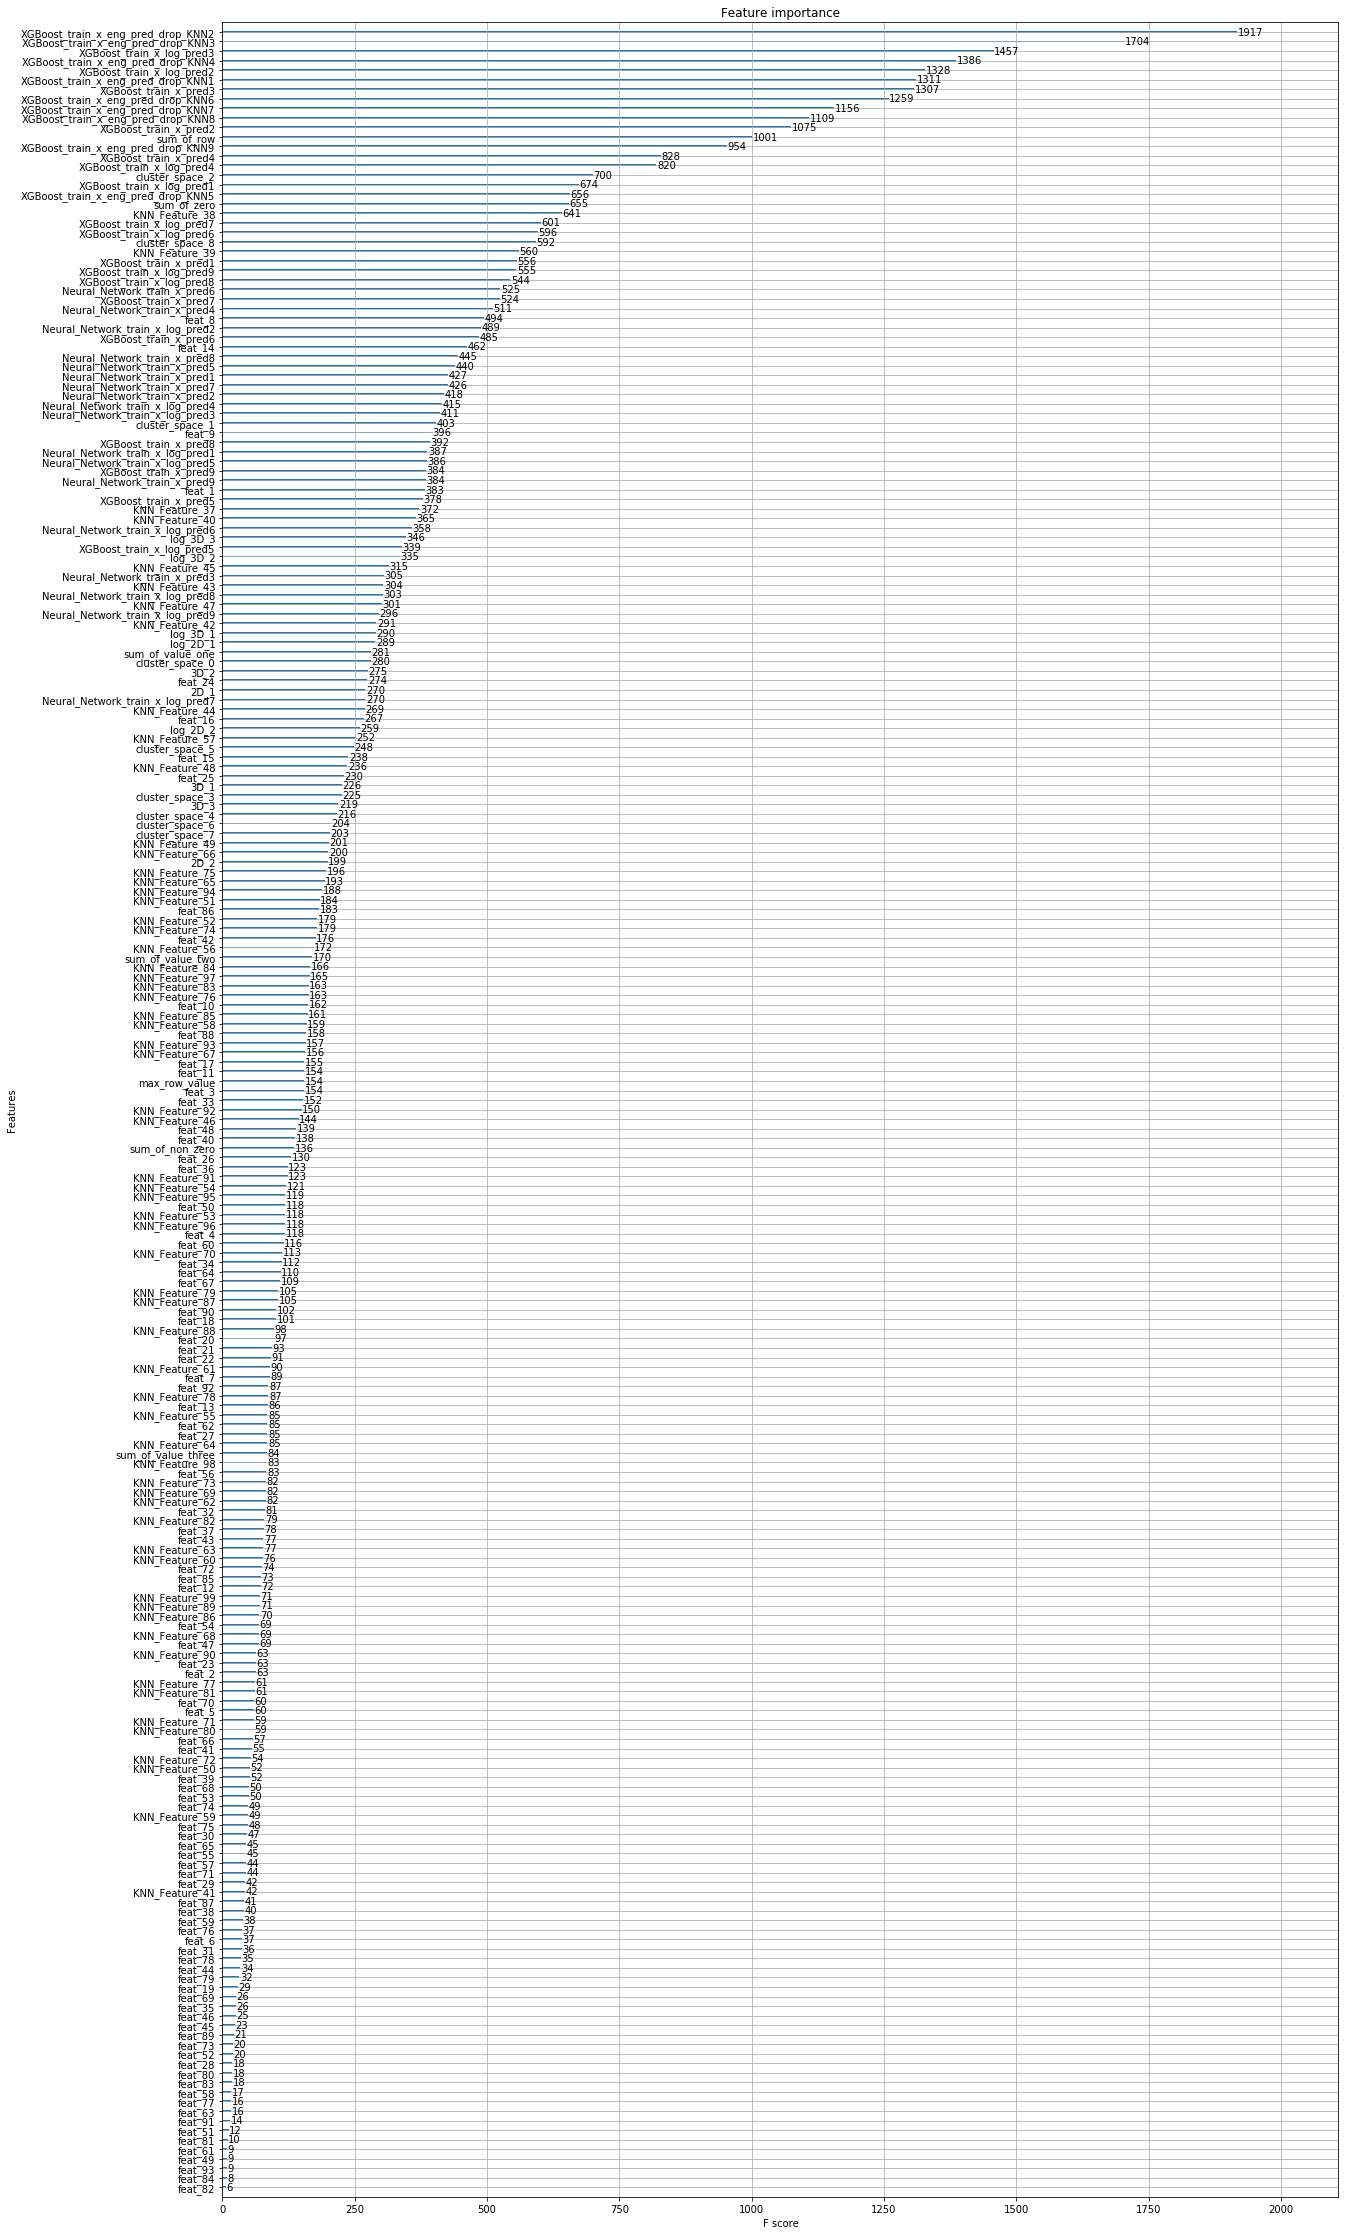

In [47]:
fig, ax = plt.subplots(figsize=(20, 40))
xgb.plot_importance(xgbFinal, ax=ax)

# XGBoost_test_x_all_included_pred_after boosting

In [48]:
XGBoost_test_x_selected_pred = xgbFinal.predict(xgb.DMatrix(test_x_selected))

In [49]:
Submission = pd.read_csv("sampleSubmission.csv")
Submission[['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9']] = XGBoost_test_x_selected_pred

In [50]:
## Creating a Submission File to submit to Kaggle competition ##
Submission.to_csv("XGBoost_test_x_selected_pred.csv",index=False)

# Saving the final XGBoost model

In [51]:
pickle.dump(xgbFinal, open("XGBoost_test_x_selected_pred_model.pickle.dat", "wb"))

# Loading the final XGBoost model

In [ ]:
XGBoost_test_x_selected_pred_model = pickle.load(open("XGBoost_test_x_selected_pred_model.pickle.dat", "rb"))

In [ ]:
# Re-forecast the prediction to verify the model
XGBoost_test_x_selected_pred = XGBoost_test_x_selected_pred_model.predict(xgb.DMatrix(test_x_selected))

# 2. Neural Network Model, train_x_selected

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.2.5
1.13.1


## To have reproducible result with keras

In [23]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
backend.set_session(sess)

# Neural Network Model

In [24]:
# define model
model = Sequential()
model.add(Dense(units=256,activation = "relu", input_dim=227))
model.add(BatchNormalization())
model.add(Dense(units=128,activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(units=64,activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(units=32,activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(9, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False, decay = 0.001)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=100,baseline=None)
model.compile(optimizer=adam, loss='categorical_crossentropy') #loss = loss function
print(backend.eval(model.optimizer.lr)) # print model learning rate

0.1


In [29]:
model.fit(train_x_selected,train_x_selected_class, validation_split = 0.05,
          batch_size=(int(train_x_selected.shape[0]*0.2)),
          epochs=10000,verbose=1, callbacks=[early_stop])

Train on 58784 samples, validate on 3094 samples
Epoch 1/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1052 - val_loss: 0.1125
Epoch 2/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1051 - val_loss: 0.1119
Epoch 3/10000
58784/58784 [==============================] - 2s 42us/step - loss: 0.1048 - val_loss: 0.1113
Epoch 4/10000
58784/58784 [==============================] - 2s 40us/step - loss: 0.1047 - val_loss: 0.1107
Epoch 5/10000
58784/58784 [==============================] - 2s 42us/step - loss: 0.1047 - val_loss: 0.1101
Epoch 6/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1045 - val_loss: 0.1096
Epoch 7/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1042 - val_loss: 0.1092
Epoch 8/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1041 - val_loss: 0.1087
Epoch 9/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.104

Epoch 76/10000
58784/58784 [==============================] - 2s 38us/step - loss: 0.1006 - val_loss: 0.1018
Epoch 77/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1005 - val_loss: 0.1018
Epoch 78/10000
58784/58784 [==============================] - 2s 38us/step - loss: 0.1004 - val_loss: 0.1018
Epoch 79/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.1004 - val_loss: 0.1017
Epoch 80/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.1004 - val_loss: 0.1017
Epoch 81/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.1003 - val_loss: 0.1017
Epoch 82/10000
58784/58784 [==============================] - 2s 39us/step - loss: 0.1003 - val_loss: 0.1017
Epoch 83/10000
58784/58784 [==============================] - 3s 47us/step - loss: 0.1004 - val_loss: 0.1017
Epoch 84/10000
58784/58784 [==============================] - 3s 48us/step - loss: 0.1003 - val_loss: 0.1016
Epoch 85/10000
5878

58784/58784 [==============================] - 2s 38us/step - loss: 0.0967 - val_loss: 0.0998
Epoch 225/10000
58784/58784 [==============================] - 2s 38us/step - loss: 0.0966 - val_loss: 0.0998
Epoch 226/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0966 - val_loss: 0.0998
Epoch 227/10000
58784/58784 [==============================] - 2s 38us/step - loss: 0.0966 - val_loss: 0.0997
Epoch 228/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0965 - val_loss: 0.0997
Epoch 229/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0966 - val_loss: 0.0998
Epoch 230/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0966 - val_loss: 0.0998
Epoch 231/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0965 - val_loss: 0.0997
Epoch 232/10000
58784/58784 [==============================] - 2s 37us/step - loss: 0.0964 - val_loss: 0.0997
Epoch 233/10000
58784/5878

58784/58784 [==============================] - 2s 36us/step - loss: 0.0936 - val_loss: 0.0977
Epoch 373/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0933 - val_loss: 0.0977
Epoch 374/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0933 - val_loss: 0.0984
Epoch 375/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0934 - val_loss: 0.1024
Epoch 376/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0934 - val_loss: 0.0989
Epoch 377/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0934 - val_loss: 0.0980
Epoch 378/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0933 - val_loss: 0.0977
Epoch 379/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0931 - val_loss: 0.0977
Epoch 380/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0932 - val_loss: 0.0976
Epoch 381/10000
58784/5878

58784/58784 [==============================] - 2s 36us/step - loss: 0.0900 - val_loss: 0.0957
Epoch 521/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0899 - val_loss: 0.0958
Epoch 522/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0897 - val_loss: 0.0959
Epoch 523/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0899 - val_loss: 0.0959
Epoch 524/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0897 - val_loss: 0.0958
Epoch 525/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0897 - val_loss: 0.0958
Epoch 526/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0897 - val_loss: 0.0958
Epoch 527/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0896 - val_loss: 0.0957
Epoch 528/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0896 - val_loss: 0.0957
Epoch 529/10000
58784/5878

58784/58784 [==============================] - 2s 36us/step - loss: 0.0859 - val_loss: 0.0947
Epoch 669/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0858 - val_loss: 0.0948
Epoch 670/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0859 - val_loss: 0.0947
Epoch 671/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0859 - val_loss: 0.0946
Epoch 672/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0858 - val_loss: 0.0947
Epoch 673/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0858 - val_loss: 0.0947
Epoch 674/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0858 - val_loss: 0.0947
Epoch 675/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0857 - val_loss: 0.0949
Epoch 676/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0858 - val_loss: 0.0946
Epoch 677/10000
58784/5878

58784/58784 [==============================] - 2s 36us/step - loss: 0.0812 - val_loss: 0.0932
Epoch 817/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0812 - val_loss: 0.0930
Epoch 818/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0811 - val_loss: 0.0930
Epoch 819/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0809 - val_loss: 0.0929
Epoch 820/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0811 - val_loss: 0.0929
Epoch 821/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0808 - val_loss: 0.0927
Epoch 822/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0808 - val_loss: 0.0928
Epoch 823/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0809 - val_loss: 0.0928
Epoch 824/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0810 - val_loss: 0.0930
Epoch 825/10000
58784/5878

58784/58784 [==============================] - 2s 35us/step - loss: 0.0746 - val_loss: 0.0905
Epoch 965/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0745 - val_loss: 0.0906
Epoch 966/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0746 - val_loss: 0.0906
Epoch 967/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0741 - val_loss: 0.0895
Epoch 968/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0740 - val_loss: 0.0898
Epoch 969/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0741 - val_loss: 0.0903
Epoch 970/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0743 - val_loss: 0.0897
Epoch 971/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0742 - val_loss: 0.0906
Epoch 972/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0741 - val_loss: 0.0900
Epoch 973/10000
58784/5878

Epoch 1112/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0670 - val_loss: 0.0895
Epoch 1113/10000
58784/58784 [==============================] - 2s 35us/step - loss: 0.0666 - val_loss: 0.0911
Epoch 1114/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0663 - val_loss: 0.0904
Epoch 1115/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0661 - val_loss: 0.0908
Epoch 1116/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0664 - val_loss: 0.0898
Epoch 1117/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0663 - val_loss: 0.0902
Epoch 1118/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0661 - val_loss: 0.0911
Epoch 1119/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0661 - val_loss: 0.0897
Epoch 1120/10000
58784/58784 [==============================] - 2s 36us/step - loss: 0.0660 - val_loss: 0.0905
E

# Visualization

In [30]:
loss_per_epoch = pd.DataFrame(model.history.history)
loss_per_epoch.iplot(y=["loss", "val_loss"], title = "loss_per_epoch")

# test_x Prediction for Ensemble Model

In [31]:
Neural_Network_test_x_selected_pred = pd.DataFrame(model.predict(test_x_selected))

In [32]:
Submission = pd.read_csv("sampleSubmission.csv")
Submission[['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9']] = Neural_Network_test_x_selected_pred

In [33]:
## Creating a Submission File to submit to Kaggle competition ##
Submission.to_csv("Neural_Network_test_x_selected_pred.csv",index=False)

# Saving NN Models

In [34]:
model.save('Neural_Network_test_x_selected_pred_model.h5')

## Load NN model

In [ ]:
from keras.models import load_model
Load_model = load_model('Neural_Network_test_x_selected_pred_model.h5')

In [ ]:
Load_model.summary()

In [ ]:
Neural_Network_test_x_selected_pred = pd.DataFrame(Load_model.predict(test_x_selected))

In [ ]:
Submission = pd.read_csv("sampleSubmission.csv")
Submission[['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9']] = Neural_Network_test_x_selected_pred

In [ ]:
## Creating a Submission File to submit to Kaggle competition ##
Submission.to_csv("Neural_Network_test_x_selected_pred.csv",index=False)

# Final Prediction, Weighted Average for XGBoost and Neural Network Prediction

In [ ]:
NN_pred = pd.read_csv("Neural_Network_test_x_selected_pred.csv")
XGBoost_pred = pd.read_csv("XGBoost_test_x_selected_pred.csv")

In [ ]:
Weighted_Average_pred = (0.5*NN_pred) + (0.5*XGBoost_pred)